<a href="https://colab.research.google.com/github/SashaKryzh/ft_linear_regression/blob/master/ft_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
DATA_URL = 'https://raw.githubusercontent.com/SashaKryzh/ft_linear_regression/master/data.csv'
df = pd.read_csv(DATA_URL)
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [0]:
def scatter(df):
  fig, ax = plt.subplots()
  ax.scatter(df['km'], df['price'])

  ax.set_title('Usage vs Price')
  ax.set_ylabel('Price (dollars)')
  ax.set_xlabel('Usage (km)')

  plt.show()

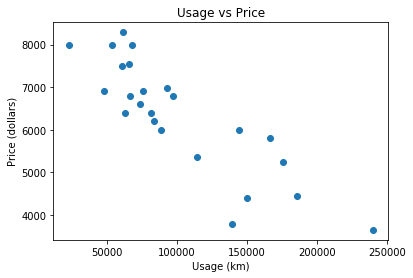

In [80]:
scatter(df)

# Train

In [155]:
def train(X, y, lr=0.01):
  X = np.c_[np.ones(X.shape[0], dtype=np.int8), np.copy(X)]
  w = np.random.rand(X.shape[1])

  iter = 0
  perf = []

  while True:
    iter += 1
    
    output = X.dot(w)
    error = output - y
    # j = error[:, None] * X
    # s = np.sum(j, axis=0)
    

    # print(output)
    # print(error)
    # print(j)
    # print(s)
    
    # print(error)
    cost = np.sum(error ** 2)
    perf.append((iter, cost, w))

    w = w - lr * (1 / X.shape[0]) * np.sum((X.dot(w) - y)[:, None] * X, axis=0)

    # print(w)

    if iter > 2:
      print(perf[-2][1] > cost)
    if (iter == 1000):
      break

  return perf
  

matrix = df.to_numpy()
z = train(matrix[:, 0], matrix[:, 1])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [146]:
a = np.array([1, 2])
b = np.array([[1, 3], [1, 5]])
print(a[:, None])
print(b)
print(a[:, None] * b)
print(np.sum(a[:, None] * b, axis=0))
print(np.sum(a[:, None] * b, axis=0) * 2)

print([3, 13] - np.sum(a[:, None] * b, axis=0) * 2)

# print(a.dot(b))
# print(b.dot(a))

# print(a.T.dot(b))
# print(b.T.dot(a))

# print(a[:, None].T.dot(b))
# print(b.T.dot(a[:, None]))

[[1]
 [2]]
[[1 3]
 [1 5]]
[[ 1  3]
 [ 2 10]]
[ 3 13]
[ 6 26]
[ -3 -13]



# Predict